<a href="https://colab.research.google.com/github/Luissalamanca23/Duckietown/blob/main/DuckietownGuiaInicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Duckietown
Duckietown es una plataforma educativa desarrollada para enseñar conceptos de robótica y sistemas autónomos de una manera accesible y práctica.
El entorno simula una ciudad en miniatura, donde pequeños robots llamados Duckiebots navegan por calles, interactúan con señales de tráfico y evitan obstáculos.

Duckiebot es un robot formado principalmente por la Nvidia Jetson Nano y su propia placa dònde va conectado la mayorìa de sensores, motores y diferentes entradas utilizadas por duckiebot.

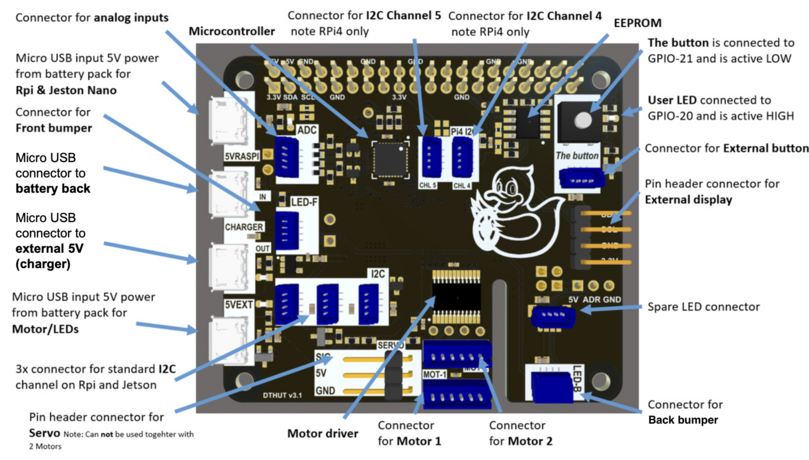

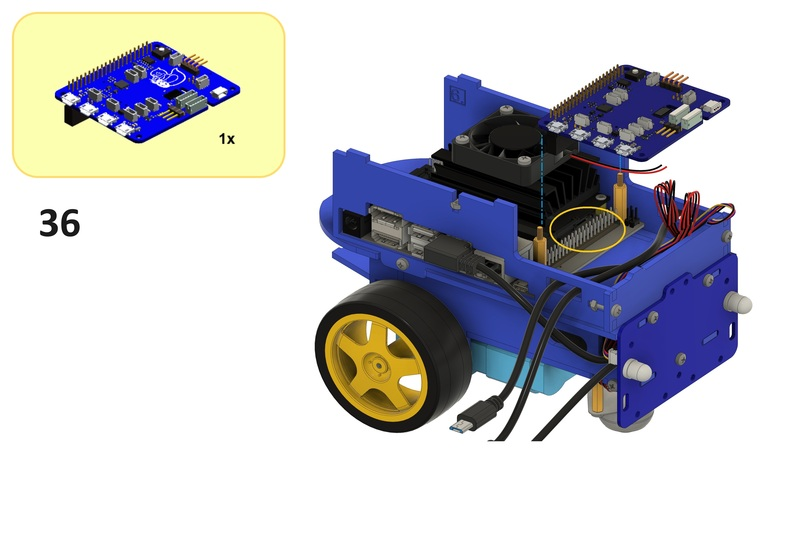

#Recursos
Duckietown como herramienta de aprendizaje cuenta con diferentes herramientas y recursos creados especialmente para el aprendizaje en la plataforma los más destacados son:

Curso obligatorio de edx: https://learning.edx.org/course/course-v1:ETHx+DT-01x+3T2023/home

Documentación oficial de duckietown:
https://docs.duckietown.com/daffy/

Comunidad de StackOverflow
https://stackoverflowteams.com/c/duckietown/questions


El curso de edx te guía hasta llegar a un nivel adecuado en los conocimientos necesarios para la implementación de inteligencia artificial en nuestro duckietown, conceptos requeridos para manejar correctamente su movimiento.

En esta clase los acompañaremos a través del desarrollo de este curso, entenderemos sus conceptos e implementaremos mediante código un agente capaz de moverse autónomamente por las carreteras.
Para la utilización de las diferentes herramientas proporcionadas por el ecosistema educativo de Duckietown instalaremos las dependencias necesarias en el sistema operativo basado en Linux, Ubuntu.

Seguir la guía en: https://docs.duckietown.com/daffy/opmanual-duckiebot/setup/setup_laptop/index.html

Utilizar obligatoriamente Ubuntu 22.04

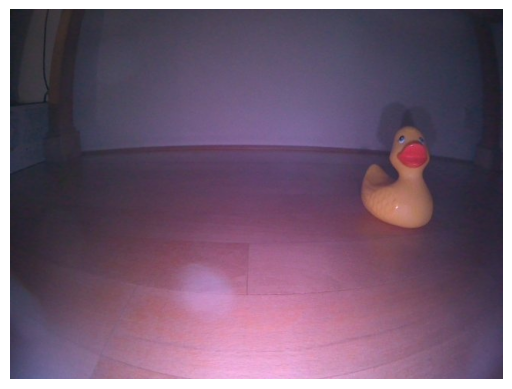

In [ ]:
file_path = '/content/drive/MyDrive/duckie-fotos/big-duck-08.jpg'

image = cv2.imread(file_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

Herramientas para definir correctamente el rango HSV:

https://pinetools.com/image-color-picker (Recomendada por Duckietown)

https://imagecolorpicker.online/es/ (Recomendada por mí)

dts code workbench --sim -L HSV (en Braitenberg)


In [ ]:
hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
lower_hsv = np.array([171, 140, 0])
upper_hsv = np.array([179, 200, 255])

In [ ]:
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
masked = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

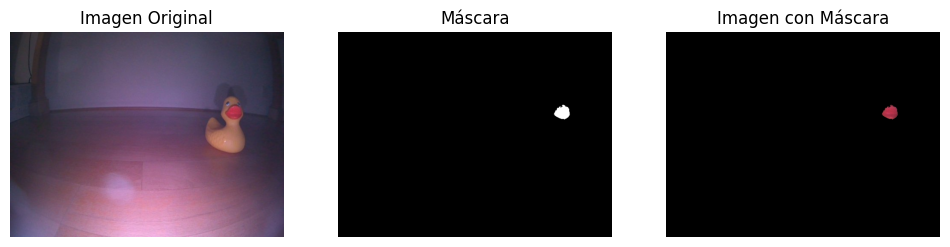

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Máscara')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Imagen con Máscara')
plt.imshow(masked)
plt.axis('off')

plt.show()

#Creando una función de pre procesado de imagen

Podemos crear una función que se encargará de fijar los rangos que necesitamos destacar y finalmente retornará la mascara necesaria para un filtrado éxitoso

In [ ]:
import cv2
import numpy as np

lower_hsv = np.array([0, 120, 180])
upper_hsv = np.array([90, 250, 255])


def preprocess(image_rgb: np.ndarray) -> np.ndarray:
    """Returns a 2D array"""
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
    return mask


#Implementación básica de un agente

Podemos crear una implementación básica de un agente que controlará los motores de nuestro robot siguiendo el siguiente concepto:

left_motor  = const + gain *  np.sum( LEFT * preprocess(image) )

right_motor = const + gain *  np.sum( RIGHT * preprocess(image) )



In [ ]:
import numpy as np
from typing import Tuple

def get_motor_left_matrix(shape: Tuple[int, int]) -> np.ndarray:
    """
    Define a weight matrix for the left motor.
    High positive values in the right part of the image will make the left motor respond more to those areas.
    """
    res = np.zeros(shape=shape, dtype="float32")
    res[:, :shape[1]//2] = 1
    res[:, shape[1]//2:] = -1

    return res

def get_motor_right_matrix(shape: Tuple[int, int]) -> np.ndarray:
    """
    Define a weight matrix for the right motor.
    High negative values in the left part of the image will make the right motor respond to those areas.
    """
    res = np.zeros(shape=shape, dtype="float32")

    res[:, shape[1]//2:] = 1  # Right half of the image
    res[:, :shape[1]//2] = -1

    return res


#Estado
En la robótica existe el concepto de 'estado' se refiere a una representación completa de todas las variables necesarias para describir el sistema en un momento dado. Esto puede incluir información de dónde está el robot o otros factores relacionados con el ambiente que pueden afectar al robot.  Cuando nosotros desarrollamos un algoritmo robótico, somos responsables de decidir la información que nosotros deseamos incluir en el estado. En otras palabras, la definición de estado depende de la tarea que nosotros estamos intentando resolver.

La conformación de un estado ideal tendría las siguientes propiedades:

*   Propiedad de Markov
*   Un mínimo estadístico para la tarea
*   Permitir la computación eficiente (optimización)
*   Generalizable

#Pose
En la robótica un estado utilizado es la pose.

La pose representa la ubicación y la orientación física del robot en el mundo. (Con orientación nos referimos hacía donde está mirando el robot). Para representar su ubicación utilizamos las coordenadas x, y, z. Por otra parte, para representar su orientación utilizamos los llamados ángulos de Euler 'roll', 'pitch' y 'yaw'.

Los ángulos de Euler son una forma común de describir la orientación tridimensional. Consisten en tres ángulos que representan una serie de rotaciones secuenciales alrededor de los ejes fijos de un sistema de coordenadas propias del objeto


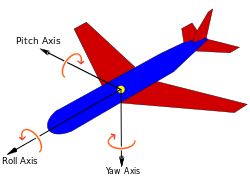

*   Roll es el ángulo que rota alrededor del eje X del objeto
*   Pitch es el ángulo que rota alrededor del eje Y del objeto, esta rotación hace que el objeto incline hacía arriba o hacía abajo como si estuviera moviendo su cabeza.
*   Yaw es el ángulo de rotación alrededor del eje Z esta rotación hace que el objeto gire en su propio eje vertical.



Por las carácteristicas innatas de mundo utilizado en Duckietown considerado como un sistema bidimensional completamente plano, podemos obviar la utilización de 2 de los 3 ángulos de euler, quedandonos únicamente con el ángulo Yaw, representado por theta.

La gran ventaja de esto es poder describir cada objeto por separado según su propio marco de referencia y con estos datos, poder realizar desplazamiento entre diferentes marcos.



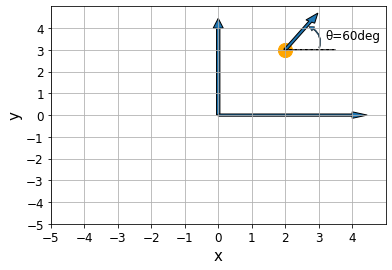

#Grupo Euclidiano
Es una manera matemática de describir cómo se pueden mover y rotar objetos en un espacio especificado sin cambiar su forma o tamaño. Es especialmente útil en áreas como la robótica, la geometría y la física.

El grupo euclidiano bidimensional (SE2) que utilizaremos se puede representar como una matriz de transformación homogenea.

Una matriz de transformación homogénea es una herramienta matemática utilizada para describir transformaciones en el espacio euclidiano, incluyendo rotaciones, translaciones, escalados y otros tipos de transformaciones afines. Estas matrices son especialmente útiles en la robótica, gráficos por computadora y visión por computadora porque permiten combinar múltiples transformaciones en una sola operación matricial.

Las dimensiones de una matriz de transformación homogenea son definidas por el número de dimensiones en el espacio donde se operará en nuestro caso 2D.


En este caso nuestra matriz de transformación homogénea enfocada a un espacio bidimensional está conformada por dos matrices específicas:
Matriz de rotación R: describe cómo se rota un objeto en el plano
Matriz de translación r: describe cómo se traslada un objeto en el plano



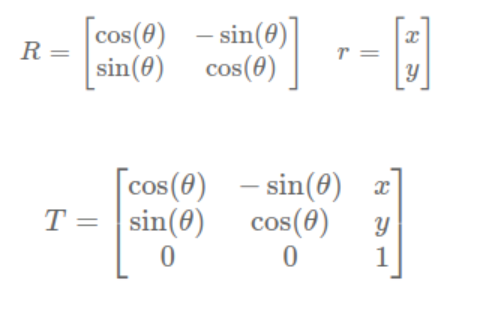

*Los ángulos siempre debemos transformarlos en radianes para ser utilizados en estas operaciones


In [ ]:
theta = np.deg2rad(60)

p = np.array([
    [np.cos(theta), -np.sin(theta), 2],
    [np.sin(theta), np.cos(theta), 3],
    [0, 0, 1]
])


#Marcos de referencia
Es frecuentemente útil convertir una pose de un sistema de referencia a otro, ya que en la descripción de un problema podemos tener múltiples sistemas de coordenadas.

Como se mencionó en la sección anterior, representar la pose en SE(n) nos permite movernos convenientemente entre sistemas de referencia. Podemos hacer esto multiplicando estas matrices de transformación entre sí.

In [ ]:
#Ejemplo de Transformaciones:

#Supongamos que tenemos un obstáculo y queremos describir su posición relativa tanto al marco del mundo o como al marco del robot a.

#Paso 1: Pose del Robot en el Marco de Origen
#Primero, describimos la pose del robot en el marco del origen o. Digamos que el robot está en la posición (213,363) con un ángulo de rotación de 10 grados:
theta = np.deg2rad(10)


p0a = np.array([
    [np.cos(theta), -np.sin(theta), 213],
    [np.sin(theta), np.cos(theta), 363],
    [0, 0, 1]
])

#Paso 2: Pose del Obstáculo en el Marco del Robot
#Ahora, digamos que hay un obstáculo en la posición (50,30) relativa al robot a. Podemos representar esta pose en el marco del robot:
pab = np.array([
   [1, 0, 50],
   [0, 1,30],
   [0, 0, 1]
])

#Paso 3: Convertir la Pose del Obstáculo al Marco del Origen
#Para encontrar la pose del obstáculo b en el marco del origen o, utilizamos lo siguiente:
#El producto línea por columna se calcula utilizando la función dot().
pob = np.dot(p0a, pab)
np.set_printoptions(precision=2, suppress=True)
print(pob)




[[  0.98  -0.17 257.03]
 [  0.17   0.98 401.23]
 [  0.     0.     1.  ]]


#Wheel Encoders
Los encoders miden cuánto se ha desplazado la rueda ya que cada desplazamiento es un tick, con estos podemos calcular y estimar movimientos, desplazamientos, traslaciones

Podemos acceder a esta medición simulada mediante:


*   dts code workbench –sim
*   Dentro de VNC, click en RQT image view
*   Click en terminal LX dentro de VNC
*   Dentro de la terminal: rostopic list
*   Dentro de la terminal: rostopic echo /agent/left_wheel_encoder_node/tick

De manera parecida, podemos observar estos ticks en nuestro robot físico:
*   dts code build
*   dts code workbench -b ROBOTNAME
*   Ingresar a VNC
*   Abrir RQT image view y terminal LX
*   Dentro de la terminal: rostopic list
*   Dentro de la terminal: rostopic echo /ROBOTNAME/left_wheel_encoder_node/tick

Finalmente y como opción secundaria para el robot físico, podríamos saltarnos los pasos de la simulación y directamente ingresar a la terminal LX desde nuestra terminal de Ubuntu:


*   dts start_gui_tools ROBOTNAME
*   rostopic echo /ROBOTNAME/left_wheel_encoder_node/tick


#Odometria
La odometría es una técnica que usamos para determinar dónde está el robot en un espacio a medida que se mueve. Lo hacemos utilizando información de sensores en las ruedas llamados "codificadores de rueda".

Los paso que seguimos para realizar este calculo son los siguientes:


*   Medición de la Rotación de las Ruedas
*   Cálculo de la Distancia Recorrida por las Ruedas
*   Movimiento del Robot
*   Posición en el Mundo

La odometría es como usar una brujula y un mapa para seguir los movimientos del robot.





In [ ]:
#Necesitamos una función que nos retorne la rotación total de la rueda en radianes y el número de ticks totales
#El total de ticks es una variable acumulativa
def delta_phi(ticks: int, prev_ticks: int, resolution: int) -> Tuple[float, float]:
    """
    Args:
        ticks: Current tick count from the encoders.
        prev_ticks: Previous tick count from the encoders.
        resolution: Number of ticks per full wheel rotation returned by the encoder.
    Return:
        dphi: Rotation of the wheel in radians.
        ticks: current number of ticks.
    """
    delta_ticks = ticks - prev_ticks
    dphi = 2 * np.pi * delta_ticks / resolution
    # ---
    return dphi, ticks


Teniendo la cantidad de rotación por rueda en radianes podemos estimar la posición actual utilizando otros datos adicionales los datos necesarios para estimar la posición son :
R: radio físico de las ruedas
Baseline: separación entre las ruedas físicas
Estimaciones previas de la posición (x,y,thetha)
La rotación de cada rueda en radianes (obtener la distancia)

Podemos medir el radio real de las ruedas en nuestro robot, para agregarlas al sistema utilizamos:


*   dts start_gui_tools ROBOTNAME
*   rosparam set /ROBOTNAME/kinematics_node/radius 0.0318
*   rosservice call /ROBOTNAME/kinematics_node/radius





Debe ser ingresado en metros

El baseline es la distancia fisica entre las ruedas de nuestro robot. Podemos medir esta distancia entre cada ruedas en nuestro robot, para agregarlas al sistema utilizamos:

*   dts start_gui_tools ROBOTNAME
*   rosparam set /ROBOTNAME/kinematics_node/baseline 0.10

Debe ser ingresado en metros


Se espera que las posiciones y las orientaciones previas sean proporcionadas

finalmente utilizamos los valores obtenido de los totales de las rotaciones de cada rueda

In [ ]:
def pose_estimation(
    R: float,
    baseline: float,
    x_prev: float,
    y_prev: float,
    theta_prev: float,
    delta_phi_left: float,
    delta_phi_right: float,
) -> Tuple[float, float, float]:
    """
    Calculate the current Duckiebot pose using the dead-reckoning model.

    Args:
        R:                  radius of wheel
        baseline:           distance from wheel to wheel
        x_prev:             previous x estimate
        y_prev:             previous y estimate
        theta_prev:         previous orientation estimate
        delta_phi_left:     left wheel rotation (rad)
        delta_phi_right:    right wheel rotation (rad)

    Return:
        x_curr:                  estimated x coordinate
        y_curr:                  estimated y coordinate
        theta_curr:              estimated heading
    """

    # Utilizando el radio (medida fisica) con el total de rotación en radianes realizado por cada rueda podemos obtener la distancia recorrida de cada rueda
    d_left = R * delta_phi_left
    d_right = R * delta_phi_right

    # al sumar cada distancia y dividirla en dos podemos obtener un aproximado de cuanto viajo realmente el robot considerando ambas ruedas
    d_A = (d_left + d_right) / 2
    #diferencia de distancia recorrida por cada rueda, si las dos ruedas recorren la misma distancia el robot avanza en linea recta sin girar, si son diferentes podemos intuir que está girando
    delta_theta = (d_right - d_left) / baseline

    # sumando la distancia total mas las posiciones anteriores podemos obtener las nuevas posiciones, la forma de incluir la rotación es la siguiente dependiendo el angulo (x = cos, y=seno)
    x_curr = x_prev + d_A * np.cos(theta_prev)
    y_curr = y_prev + d_A * np.sin(theta_prev)
    #finalmente obtenemos la orientación actual utilizando estos valores
    theta_curr = theta_prev + delta_theta

    return x_curr, y_curr, theta_curr


#PID CONTROLLER
Un controlador PID es una herramienta que ayuda a un robot, como el Duckiebot, a ajustar su comportamiento para alcanzar un objetivo específico. En este caso, el objetivo es mantener al Duckiebot en el centro del carril.

Componentes del PID


*   kp: Respuesta de error actual (PROPORCIONAL)
*   ki: Considera la acumulación de errores (INTEGRAL)
*   kd: Responde a la rapidez con la que c ambia el error (DERIVATIVO)


#Definiciones para la creación de un controlador PID
Primero debemos definir los terminos Proporcionales, Integrales y Derivativos,
Mediante los cuadernillos de Duckietown podemos definir estos términos de manera más dinámica guíandonos por tres diferentes técnicas de definición de estos mismos, puedes probar con cada uno y definir cuál te da los mejores resultados





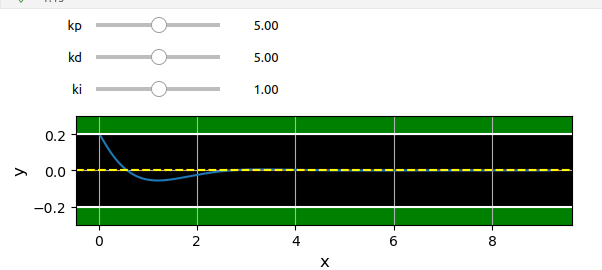

#¿Por qué el eje Y?
En este caso el controlador PID implementado busca lograr que duckiebot se mueva principalmente por su carril, en un escenario idilico iría únicamente por el eje X, este controlar busca controlar y disminuir las posibilidades en las que duckiebot se desvìe de su proposito de seguir el centro del carril o su eje X en otras palabras.

Para poder construir una controlador PID funcional necesitamos una función que obtenga los siguientes argumentos:


*   v_0 = Velocidad constante del duckie en linea recta
*   y_ref = Este es el objetivo, la posición en el eje y donde queremos que el Duckiebot esté. Es el punto de referencia que estamos tratando de alcanzar.
*   y_hat = Posición Actual (y_hat): Esta es la posición actual del Duckiebot en el eje y. Es la estimación de dónde está el Duckiebot en este momento.
*   prev_e_y = error de seguimiento de la iteración anterior
*   prev_int_y = Es la suma acumulada de los errores de seguimiento anteriores.
*   delta_t = intervalo de tiempo entre la ultima llamada de la función

Para poder decir que la implementación de nuestro controlador PID fue exitoso, debimos haber obtenido:
*   v_0 = se retorna la constante de velocidad de duckietown
*   omega = Representa cuánto debe girar el Duckiebot para corregir su trayectoria y acercarse al eje y deseado. Si el omega es positivo, el Duckiebot girará hacia un lado; si es negativo, girará hacia el otro.
*   e = error de seguimiento actual (diferencia entre y_querida y y_obtenida)
*   e_int = Es la suma acumulada del error de seguimiento a lo largo del tiempo, multiplicada por delta_t. Este término se utiliza para corregir errores persistentes y se convierte en prev_int_y para la siguiente iteración.


Estos valores serán pasados automáticamente al archivo que configura estas ganancias debes recordar que:

*   kp es el encargado de controlar la proporción del valor actual. Mientras mayor el valor de 'kp' el controlador reaccionará de manera más violenta a las correcciones en el momento.
*   ki controla la respuesta a los errores que se van acumulando. Si solo se utilizará la ganancia proporcional estos errores se irían acumulando afectando el desarrollo de nuestro agente en su misión.
*   kd es el encargado de ir midiendo el error actual con el error acumulativo generando una tendencia. Mediante esta tendencia podemos intutir o anticiparnos a un comportamiento agresivo o constante en los cambios en el ambiente que afecten a nuestro controlador.





Para obtener el **error de seguimiento actual** debemos obtener la diferencia entre la posición Y deseada y la posición Y real en la que nos encontramos.

In [ ]:
error_seguimiento_actual = y_referencia - y_actual

Para obtener el error acumulativo debemos calcular el error de seguimiento actual por el tiempo real entre cada llamada al controlador PID, esto es crucial para calcular el acumulado del error de manera precisa en función del tiempo real, ademàs de ir sumandole el error acumulativo de cada iteración.

In [ ]:
error_acumulativo = error_acumulativo_anterior + error_seguimiento_actual * tiempo

Debemos obtener la tasa de cambio del error para predecir futuros errores y lograr que el controlador se adapte. Para eso necesitamos saber la diferencia entre el error actual y el error acumulativo (recuerda que si este valor es bajo las condiciones están siendo constantes), además debemos dividirlo por cada llamada a la función del controlador PID, para poder como realmente se comporta este cambio a pasar el tiempo (que generalmente es constante)

In [ ]:
tasa_cambio = (error_seguimiento_actual - error_acumulativo) / tiempo

Cálculo de Omega:

Debemos llegar al valor de Omega, recordemos que Omega es cuanto debe nuestro agente corregir su trayectoria para lograr acercarse al eje deseado.

Utilizamos la importancia dada a nuestros valores Kp, Ki, Kd para definir omega:


In [ ]:
omega = Kp*e_dist + Ki*e_int_dist + Kd*delta_et_dist

In [ ]:
def PIDController(
    v_0: float, y_ref: float, y_hat: float, prev_e_y: float, prev_int_y: float, delta_t: float #, theta_hat: float , prev_e: float
) -> Tuple[float, float, float, float]:
    """
    PID performing lateral control.

    Args:
        v_0:        linear Duckiebot speed (constant).
        y_ref:      target y coordinate.
        y_hat:      the current estimated y.
        prev_e_y:   tracking error at previous iteration.
        prev_int_y: previous integral error term.
        delta_t:    time interval since last call.

    Returns:
        v_0:        linear velocity of the Duckiebot
        omega:      angular velocity of the Duckiebot
        e:          current tracking error (automatically becomes prev_e_y at next iteration).
        e_int:      current integral error (automatically becomes prev_int_y at next iteration).
    """

    # Read PID gains from file
    #script_dir = os.path.dirname(__file__)
    #file_path = script_dir + "/GAINS.yaml"

    #with open(file_path) as f:
        #gains = yaml.full_load(f)
        #f.close()

    Kp = 5
    Ki = 5
    Kd = 1

    e_dist = y_ref-y_hat

    e_int_dist = prev_e_y + e_dist * delta_t

    delta_et_dist = (e_dist - e_int_dist) / delta_t


    # PID controller for omega
    omega = Kp*e_dist + Ki*e_int_dist + Kd*delta_et_dist



    return v_0, omega, e_dist, e_int_dist


In [ ]:
from typing import Tuple

import numpy as np
import cv2


def get_steer_matrix_left_lane_markings(shape: Tuple[int, int]) -> np.ndarray:

    # TODO: write your function instead of this one
    steer_matrix_left = np.zeros(shape)
    steer_matrix_left[230:, 100:250] = -1

    return steer_matrix_left


def get_steer_matrix_right_lane_markings(shape: Tuple[int, int]) -> np.ndarray:

 # TODO: write your function instead of this one
    steer_matrix_right = np.zeros(shape)
    steer_matrix_right[220:, 400:680] = 1

    return steer_matrix_right


def detect_lane_markings(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    imgbgr = image
    img = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2HSV)
    imgg = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2GRAY)

    mask_ground = np.ones(imgg.shape, dtype=np.uint8)
    mask_ground[0:180, ::] = 0

    white_lower_hsv = np.array([0, 0, 150])
    white_upper_hsv = np.array([180, 50, 255])
    yellow_lower_hsv = np.array([20, 45, 150])
    yellow_upper_hsv = np.array([40, 255, 255])


    mask_white = cv2.inRange(img, white_lower_hsv, white_upper_hsv)
    mask_yellow = cv2.inRange(img, yellow_lower_hsv, yellow_upper_hsv)

    mask_left_edge = mask_ground * mask_yellow
    mask_right_edge = mask_ground * mask_white


    return mask_left_edge, mask_right_edge